In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Linear Regression

In [4]:
df = pd.read_csv('/Users/vigneshgurumohan/Downloads/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/USA_Housing.csv')

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

/Users/vigneshgurumohan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


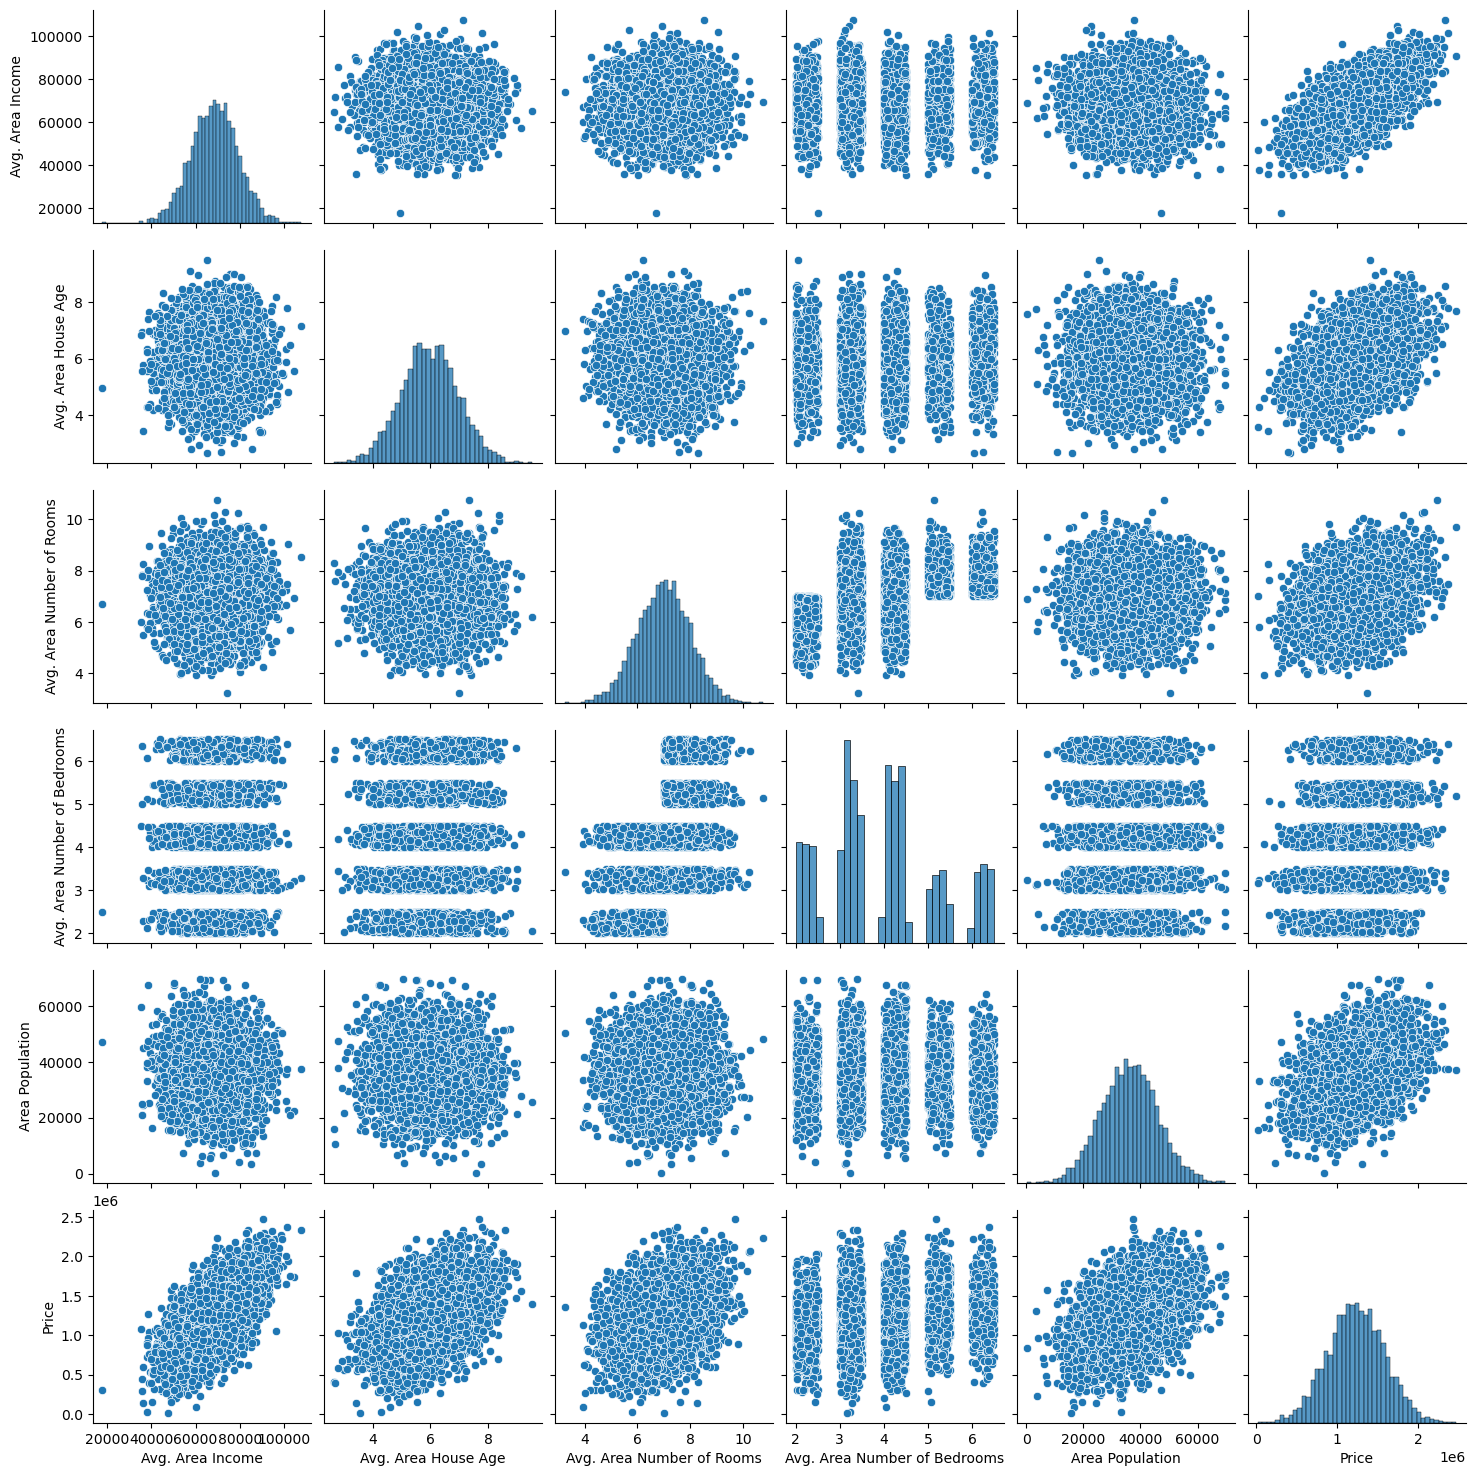

In [9]:
sns.pairplot(df)

/tmp/ipykernel_75481/834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

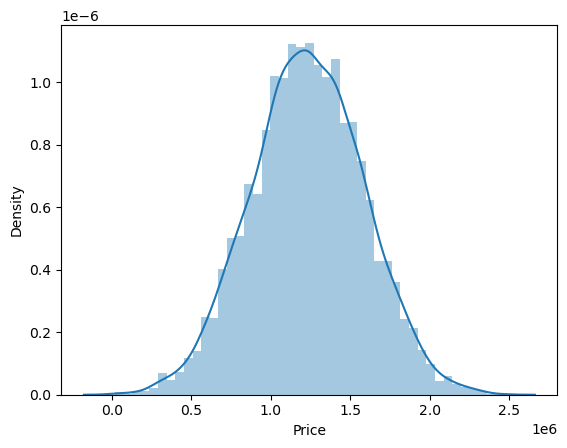

In [11]:
sns.distplot(df['Price'])

<Axes: >

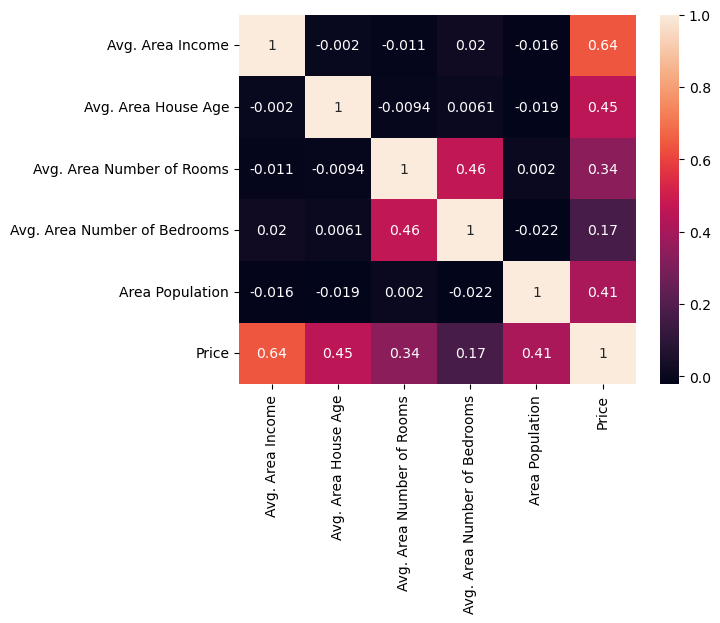

In [19]:
sns.heatmap(df.drop(['Address'],axis = 1).corr(),annot = True)

In [20]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [31]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
print(lm.intercept_)

-2640159.7968526958


In [39]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [40]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [42]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns = ['coeff'])

In [43]:
cdf

,coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [45]:
predictions = lm.predict(X_test)

In [46]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140899, 1914519.5417888 ])

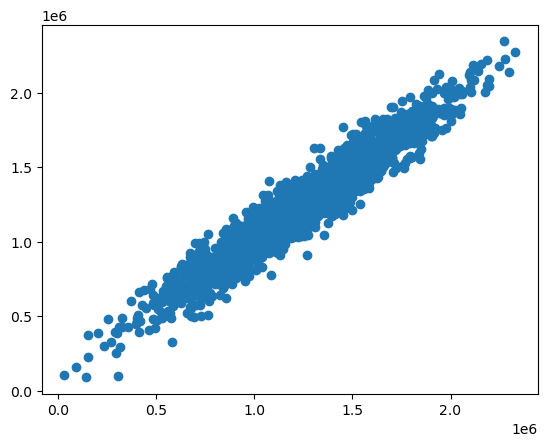

In [60]:
plt.scatter(y_test,predictions)


/tmp/ipykernel_75481/202957839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


<Axes: xlabel='Price', ylabel='Density'>

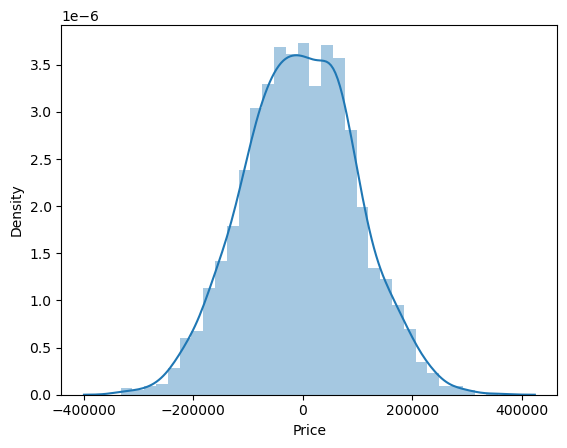

In [48]:
sns.distplot((y_test - predictions)

In [49]:
from sklearn import metrics

In [51]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914942

In [53]:
metrics.mean_squared_error(y_test,predictions)

10460958907.208977

In [55]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290897

# Logistic Regression - Classification - Sigmoid Function

In [ ]:
#False Positive - Type 1 Error - predicting a man as pregnant
#False Negative - type 2 Error - predicting an obviously prg woman as not pregnant

#Accuracy - TP/total predictions
#Error Rate - (FP+FN)/total predictions

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
train = pd.read_csv('/Users/vigneshgurumohan/Downloads/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

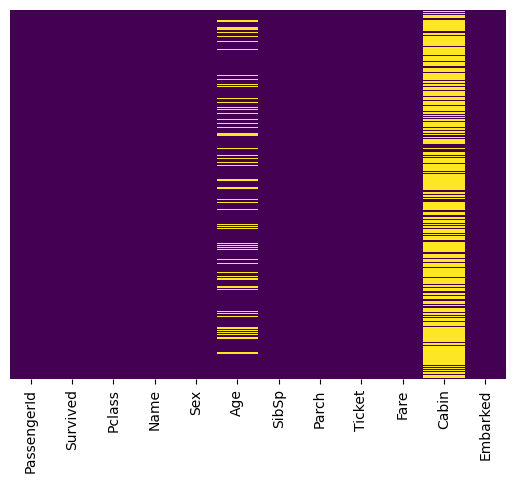

In [74]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis') #null visualisation

In [75]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

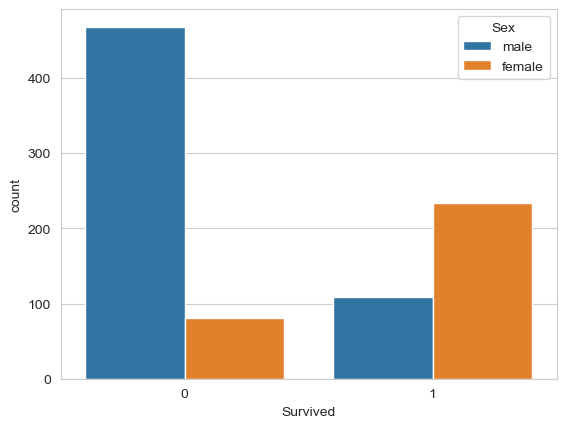

In [77]:
sns.countplot(x='Survived',data=train, hue = 'Sex')

<Axes: xlabel='Survived', ylabel='count'>

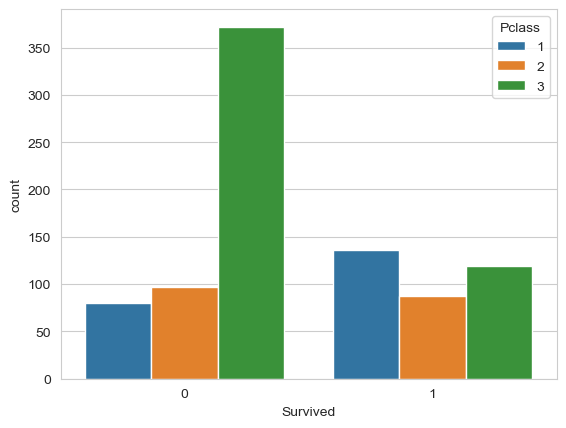

In [78]:
sns.countplot(x='Survived',data=train, hue = 'Pclass')

/tmp/ipykernel_75481/2423461276.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), bins = 30)


<Axes: xlabel='Age', ylabel='Density'>

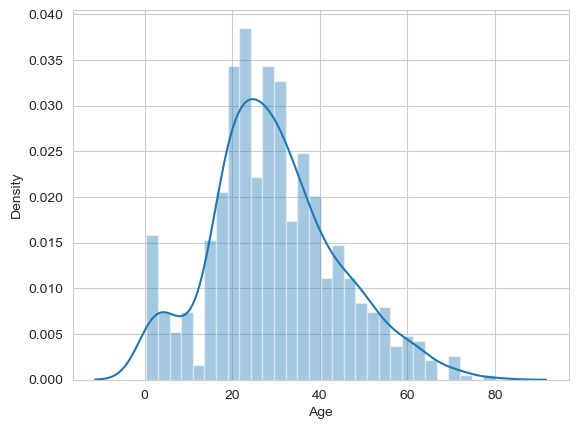

In [80]:
sns.distplot(train['Age'].dropna(), bins = 30)

<Axes: xlabel='SibSp', ylabel='count'>

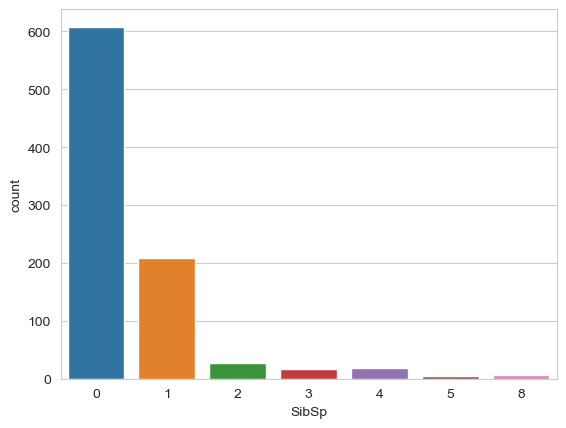

In [84]:
sns.countplot(x='SibSp',data=train)

<Axes: >

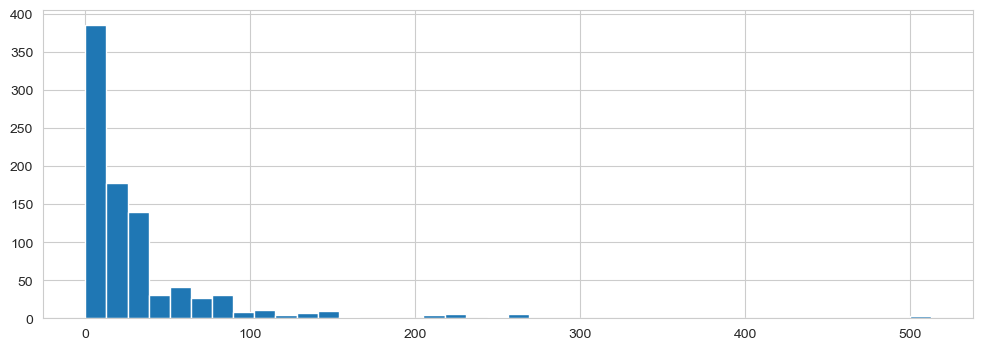

In [88]:
train['Fare'].hist(bins = 40, figsize=(12,4))

<Axes: xlabel='Pclass', ylabel='Age'>

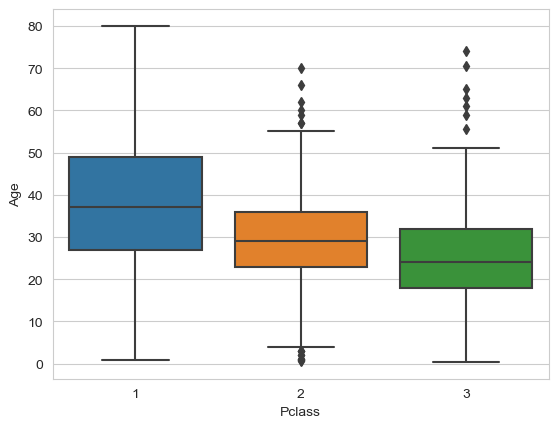

In [89]:
sns.boxplot(x='Pclass',y='Age',data = train)

In [90]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1: return 37
        elif Pclass == 2 : return 29
        else: return 24
    else : return Age

In [91]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

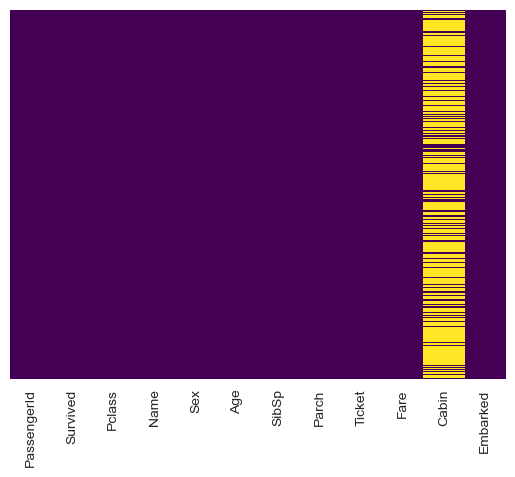

In [92]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis') #null visualisation

In [93]:
train.drop('Cabin', axis = 1, inplace =True)

<Axes: >

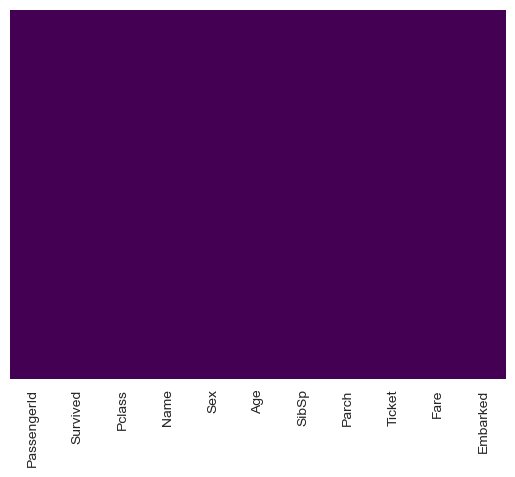

In [94]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis') #null visualisation

In [95]:
train.dropna(inplace=True)

In [97]:
sex = pd.get_dummies(train['Sex'],drop_first = True)

In [98]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [99]:
train = pd.concat([train,sex,embark],axis = 1)

In [ ]:
# can also be done like below
#cat_feats= ['Sex','Embarked']
#train = pd.get_dummies(train,columns=cat_feats,drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1, inplace = True)

In [110]:
train.drop(['PassengerId'],axis = 1,inplace = True)

In [112]:
train = train.replace({True: 1, False: 0})

In [114]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [115]:
X = train.drop(['Survived'],axis = 1)
y = train['Survived']

In [116]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
logmodel = LogisticRegression()

In [121]:
logmodel.fit(X_train,y_train)

/Users/vigneshgurumohan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
predictions = logmodel.predict(X_test)

In [123]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
print(confusion_matrix(y_test,predictions))

[[147  16]
 [ 30  74]]


In [147]:
pd.concat([pd.DataFrame(X.columns),pd.DataFrame(logmodel.coef_.reshape(8,1))],axis = 1)

,0,0
0,Pclass,-1.205391
1,Age,-0.045689
2,SibSp,-0.255799
3,Parch,-0.021712
4,Fare,0.001347
5,male,-2.451756
6,Q,0.115863
7,S,-0.170724


# KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/vigneshgurumohan/Downloads/Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors/Classified Data',index_col = 0)

In [4]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis = 1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis = 1))

In [13]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])

In [14]:
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
pred = knn.predict(X_test)

In [29]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [27]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

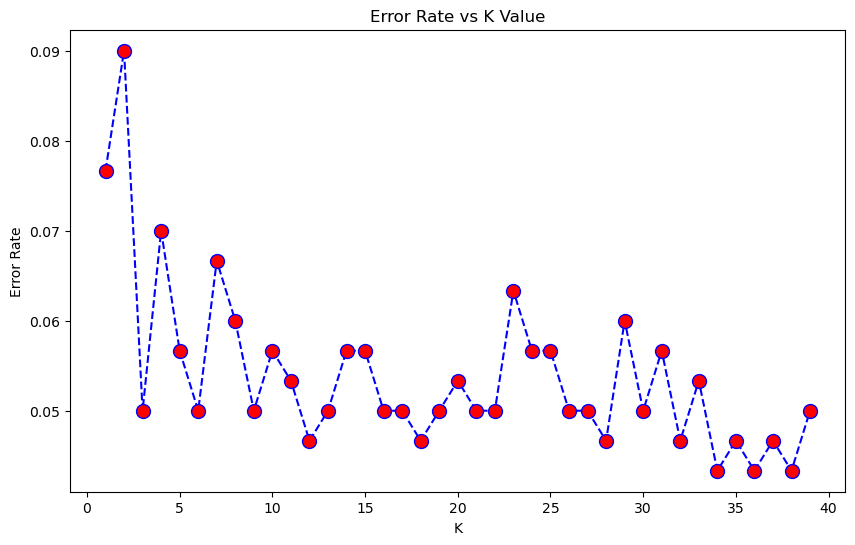

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color ='blue',linestyle = '--',marker = 'o',markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[153   6]
 [  9 132]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



# Decision trees and Random Forest

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
df = pd.read_csv('/Users/vigneshgurumohan/Downloads/Refactored_Py_DS_ML_Bootcamp-master/15-Decision-Trees-and-Random-Forests/kyphosis.csv')

In [33]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


/Users/vigneshgurumohan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


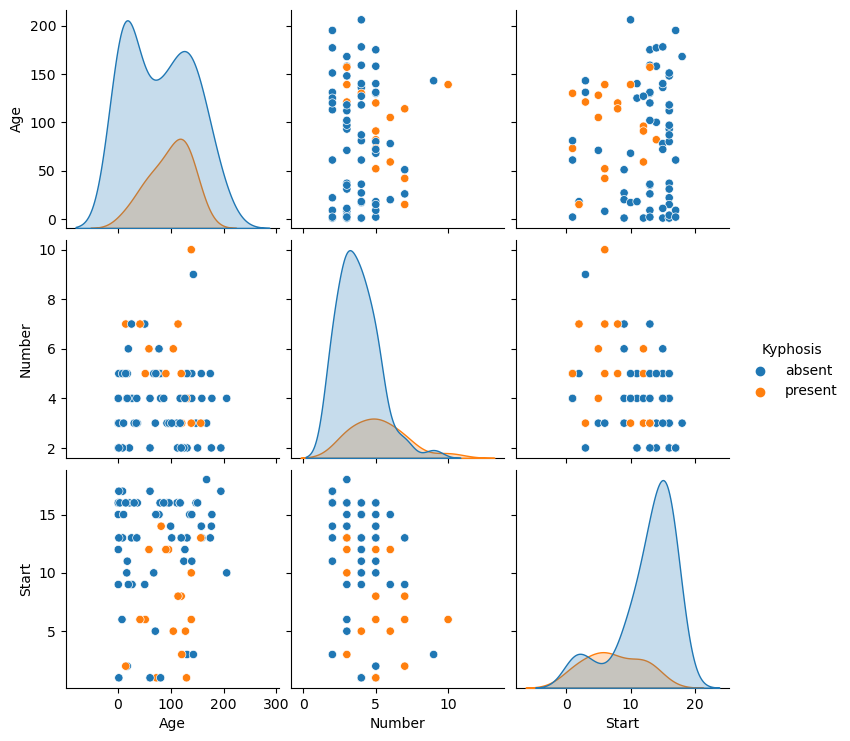

In [35]:
sns.pairplot(df,hue='Kyphosis')

In [38]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop('Kyphosis',axis = 1)
y = df['Kyphosis']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dtree = DecisionTreeClassifier()

In [66]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
predictions = dtree.predict(X_test)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[17  3]
 [ 4  1]]
              precision    recall  f1-score   support

      absent       0.81      0.85      0.83        20
     present       0.25      0.20      0.22         5

    accuracy                           0.72        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.70      0.72      0.71        25



In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier(n_estimators = 200)

In [72]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [73]:
rfc_pred = rfc.predict(X_test)

In [74]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[19  1]
 [ 4  1]]
              precision    recall  f1-score   support

      absent       0.83      0.95      0.88        20
     present       0.50      0.20      0.29         5

    accuracy                           0.80        25
   macro avg       0.66      0.57      0.58        25
weighted avg       0.76      0.80      0.76        25



# Support Vector Machines

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [9]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [17]:
df_feat = pd.DataFrame(cancer['data'],columns = cancer['feature_names'])

In [18]:
df_feat

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X = df_feat
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.svm import SVC

In [24]:
model = SVC()

In [25]:
model.fit(X_train,y_train)

SVC()

In [26]:
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 56  10]
 [  3 102]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [30]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'C':[0,1,10,100,10000], 'gamma':[1,0.1,0.01,0.001,0.0001]} 

#C - cost of mis-classification large - C value minimises bias and maximises variance
#gamma - high gamma will lead to high bias and low variance

In [33]:
grid = GridSearchCV(SVC(),param_grid,verbose =3)

In [34]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 2/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 3/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 4/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 5/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 1/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 2/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 3/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 4/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 5/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 1/5] END .....................C=0, gamma=0.01;, score=nan total time=   0.0s
[CV 2/5] END .....................C=0, gamma=0.

[CV 4/5] END ................C=10000, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ................C=10000, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END ...............C=10000, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END ...............C=10000, gamma=0.01;, score=0.637 total time=   0.0s
[CV 3/5] END ...............C=10000, gamma=0.01;, score=0.613 total time=   0.0s
[CV 4/5] END ...............C=10000, gamma=0.01;, score=0.633 total time=   0.0s
[CV 5/5] END ...............C=10000, gamma=0.01;, score=0.633 total time=   0.0s
[CV 1/5] END ..............C=10000, gamma=0.001;, score=0.887 total time=   0.0s
[CV 2/5] END ..............C=10000, gamma=0.001;, score=0.912 total time=   0.0s
[CV 3/5] END ..............C=10000, gamma=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END ..............C=10000, gamma=0.001;, score=0.937 total time=   0.0s
[CV 5/5] END ..............C=10000, gamma=0.001;, score=0.924 total time=   0.0s
[CV 1/5] END .............C=

/Users/vigneshgurumohan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vigneshgurumohan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vigneshgurumohan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/vigneshgurumohan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    va

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 10, 100, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [35]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [36]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [37]:
grid_predictions = grid.predict(X_test)

In [38]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



# K Means Clustering

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
from sklearn.datasets import make_blobs

In [43]:
data = make_blobs(n_samples = 200, n_features = 2 , centers = 4, cluster_std = 1.8 , random_state = 101)

In [47]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [48]:
data[0]

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

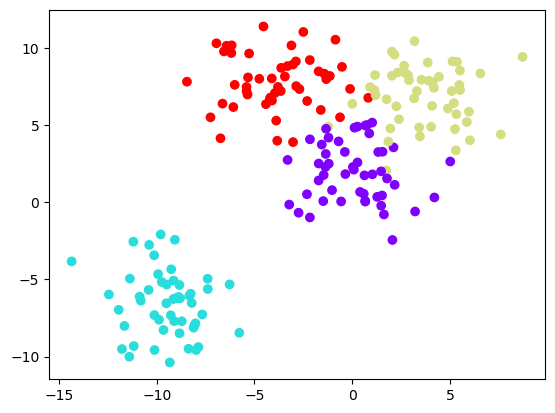

In [50]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap = 'rainbow')

In [51]:
from sklearn.cluster import KMeans

In [53]:
kmeans = KMeans(n_clusters = 4)

In [54]:
kmeans.fit(data[0])

/Users/vigneshgurumohan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [55]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-0.0123077 ,  2.13407664]])

In [57]:
kmeans.labels_

array([0, 2, 3, 2, 2, 1, 2, 3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 1, 0, 1, 3,
       3, 1, 0, 1, 1, 3, 2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 2, 0, 3, 1, 3, 3, 0, 2, 3, 1, 0, 3, 3, 0, 2, 1, 2, 1, 0, 2, 3,
       1, 2, 2, 1, 2, 3, 1, 3, 1, 2, 2, 3, 0, 3, 3, 1, 2, 1, 3, 3, 3, 0,
       3, 1, 1, 1, 1, 3, 3, 1, 2, 0, 1, 2, 3, 1, 3, 3, 2, 3, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 3, 0, 3, 0, 3, 2, 0, 3, 1, 0, 0, 0,
       3, 1, 1, 0, 2, 0, 2, 3, 1, 2, 1, 0, 0, 2, 3, 1, 0, 0, 0, 0, 3, 2,
       3, 0, 2, 2, 2, 3, 2, 3, 3, 0, 1, 0, 3, 2, 0, 3, 2, 3, 0, 2, 3, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 2, 2, 0, 1, 3, 2, 2,
       1, 3], dtype=int32)

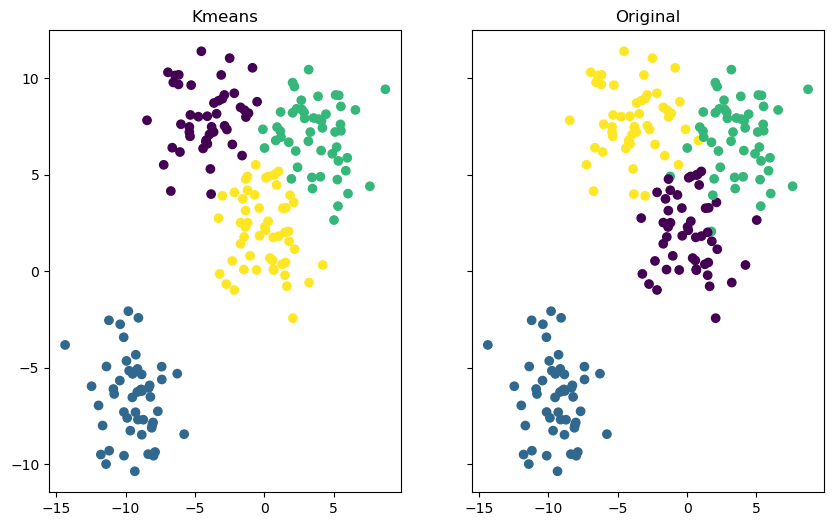

In [59]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey = True,figsize=(10,6))
ax1.set_title("Kmeans")
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_)
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1])

# Principal component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
type(cancer)

sklearn.utils._bunch.Bunch

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
df = pd.DataFrame(cancer['data'],columns =cancer['feature_names'])

In [8]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df)

StandardScaler()

In [12]:
scaled_data = scaler.transform(df)

In [13]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components = 2)

In [22]:
pca.fit(scaled_data)

PCA(n_components=2)

In [23]:
x_pca = pca.transform(scaled_data)

In [24]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

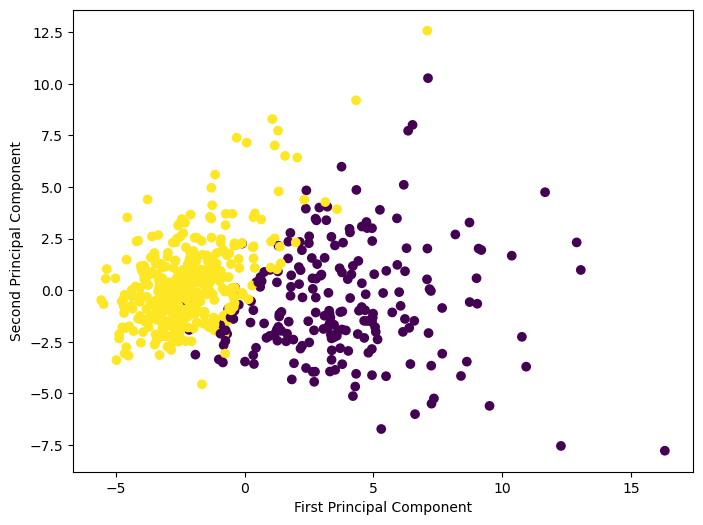

In [25]:

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [26]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [27]:
df_comp = pd.DataFrame(pca.components_,columns = cancer['feature_names'])

In [28]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<Axes: >

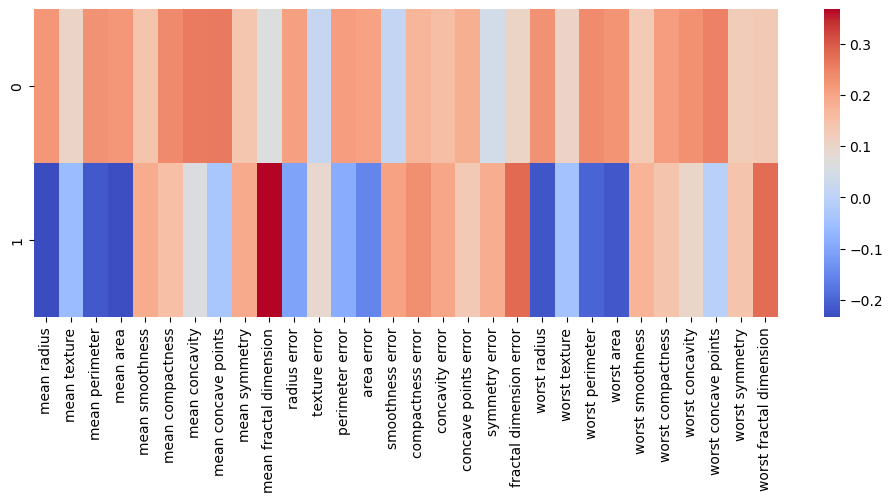

In [29]:
plt.figure(figsize = (12,4))
sns.heatmap(df_comp,cmap = 'coolwarm')

# Recommendation Systems - Item Similiarity Based

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
columns_names = ['user_id','item_id','rating','timestamp']

In [33]:
df = pd.read_csv('/Users/vigneshgurumohan/Downloads/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/u.data',sep='\t',names = columns_names)

In [34]:
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [37]:
movie_titles = pd.read_csv('/Users/vigneshgurumohan/Downloads/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/Movie_Id_Titles')

In [38]:
df = pd.merge(df,movie_titles,on='item_id')

In [42]:
df.groupby('title')['rating'].mean().sort_values(ascending = False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [43]:
df.groupby('title')['rating'].count().sort_values(ascending = False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [44]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [46]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [47]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<Axes: >

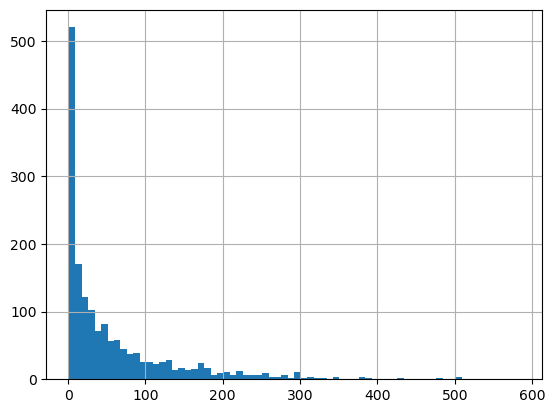

In [48]:
ratings['num of ratings'].hist(bins = 70)

<Axes: >

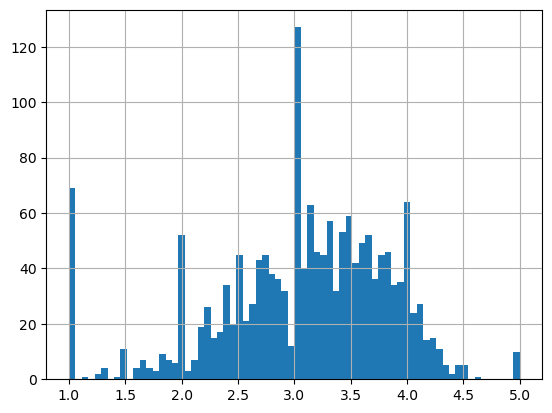

In [50]:
ratings['rating'].hist(bins = 70)

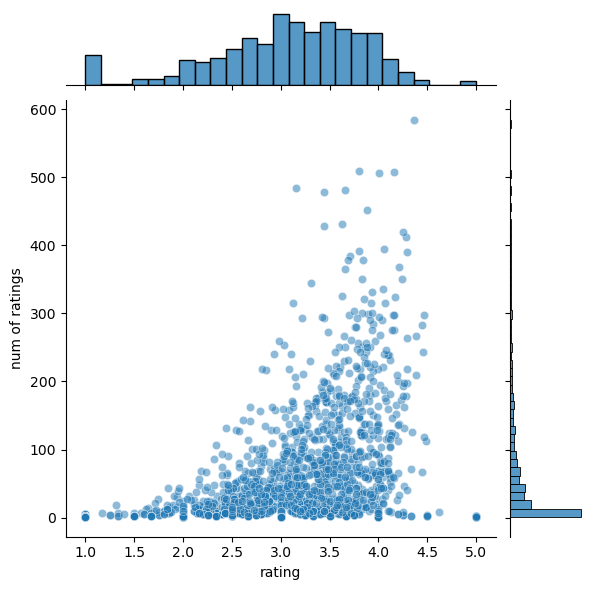

In [51]:
sns.jointplot(x='rating',y='num of ratings',data = ratings,alpha = 0.5)

In [55]:
moviemat = df.pivot_table(index = 'user_id',columns = 'title',values = 'rating')

In [56]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
starwars_user_rating = moviemat['Star Wars (1977)']
liarliar_user_rating = moviemat['Liar Liar (1997)']

In [58]:
starwars_user_rating

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [61]:
similar_to_starwars = moviemat.corrwith(starwars_user_rating)

/Users/vigneshgurumohan/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/vigneshgurumohan/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [68]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_rating)

/Users/vigneshgurumohan/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/vigneshgurumohan/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [69]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns = ['Correlation'])
corr_starwars.dropna(inplace = True)

In [70]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [71]:
corr_starwars.sort_values('Correlation',ascending = False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


In [72]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [74]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending = False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [75]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns = ['Correlation'])
corr_liarliar.dropna(inplace = True)

In [76]:
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])

In [77]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending = False)

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194


# Natural Language Processing

In [78]:
!pip install nltk

In [79]:
import nltk

In [80]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp

        /Users/vigneshgurumohan/nltk_data...
      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [81]:
messages = [line.rstrip() for line in open('/Users/vigneshgurumohan/Downloads/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection')]

In [83]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [87]:
len(messages)

5574

In [88]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [89]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [90]:
import pandas as pd

In [93]:
messages = pd.read_csv('/Users/vigneshgurumohan/Downloads/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection'
                      ,sep = '\t',names = ['label','message'])

In [94]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [96]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [99]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [101]:
messages['length'] = messages['message'].apply(len)

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

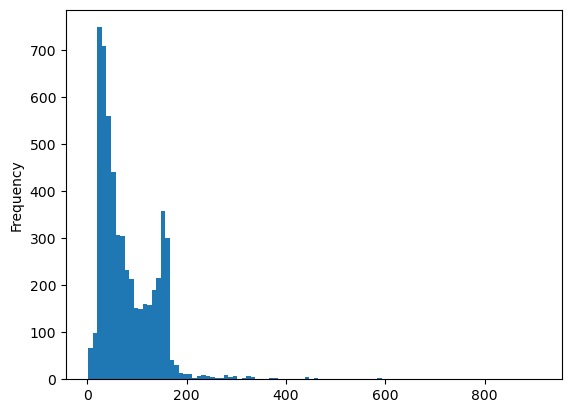

In [105]:
messages['length'].plot.hist(bins = 100)

In [111]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

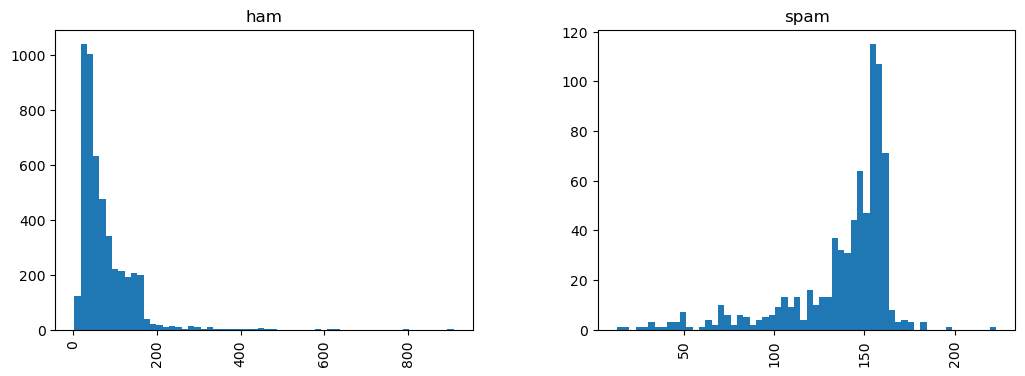

In [113]:
messages.hist(column = 'length', by ='label', bins = 60, figsize=(12,4))

In [114]:
import string

In [147]:
mess = 'Sample! :Punch. my has hi mine Method'


In [148]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [149]:
nopunc = [c for c in mess if c not in string.punctuation]

In [150]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'P',
 'u',
 'n',
 'c',
 'h',
 ' ',
 'm',
 'y',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'h',
 'i',
 ' ',
 'm',
 'i',
 'n',
 'e',
 ' ',
 'M',
 'e',
 't',
 'h',
 'o',
 'd']

In [151]:
from nltk.corpus import stopwords

In [152]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [153]:
nopunc = ''.join(nopunc)

In [154]:
nopunc

'Sample Punch my has hi mine Method'

In [155]:
nopunc.split()

['Sample', 'Punch', 'my', 'has', 'hi', 'mine', 'Method']

In [156]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [157]:
clean_mess

['Sample', 'Punch', 'hi', 'mine', 'Method']

In [160]:
"""
1. remove punc
2. remove stop words
3. return list of clean text words
"""
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [161]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [162]:
from sklearn.feature_extraction.text import CountVectorizer

In [163]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [164]:
len(bow_transformer.vocabulary_)

11425

In [165]:
mess4 = messages['message'][3]

In [166]:
mess4

'U dun say so early hor... U c already then say...'

In [167]:
bow4 = bow_transformer.transform([mess4])

In [168]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [170]:
bow4.shape

(1, 11425)

In [172]:
bow_transformer.get_feature_names_out()[4068]

'U'

In [173]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [174]:
messages_bow = bow_transformer.transform(messages['message'])

In [175]:
print('Shape of Sparse Matrix:',messages_bow.shape)

Shape of Sparse Matrix: (5572, 11425)


In [176]:
messages_bow.nnz

50548

In [177]:
50548/(5572*11425) #non zero ratio

0.0007940295412668218

In [178]:
from sklearn.feature_extraction.text import TfidfTransformer

In [179]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [180]:
tfidf4 = tfidf_transformer.transform(bow4)

In [182]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [187]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['hello']]

7.8339293183414815

In [188]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [189]:
from sklearn.naive_bayes import MultinomialNB

In [190]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [193]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [194]:
messages['label'][3]

'ham'

In [195]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [196]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [197]:
from sklearn.model_selection import train_test_split

In [204]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size = 0.3)

In [199]:
msg_train

2160    FREE for 1st week! No1 Nokia tone 4 ur mob eve...
4519    That sucks. So what do you got planned for you...
4900      Haha, that was the first person I was gonna ask
1535                               Remember on that day..
1263    Hungry gay guys feeling hungry and up 4 it, no...
                              ...                        
2400                           Oh... Kay... On sat right?
5556    Yes i have. So that's why u texted. Pshew...mi...
2535                        Ok enjoy . R u there in home.
1517    I need to come home and give you some good lov...
1205    WIN a year supply of CDs 4 a store of ur choic...
Name: message, Length: 3900, dtype: object

In [200]:
from sklearn.pipeline import Pipeline

In [201]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [202]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x13463d440>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [205]:
predictions = pipeline.predict(msg_test)

In [209]:
from sklearn.metrics import classification_report,confusion_matrix

In [207]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1494
        spam       0.76      1.00      0.86       178

    accuracy                           0.97      1672
   macro avg       0.88      0.98      0.92      1672
weighted avg       0.97      0.97      0.97      1672



In [210]:
print(confusion_matrix(predictions,label_test))

[[1438   56]
 [   0  178]]
